<table>
    <tr>
        <td width="20%">
            <img src="down.png">
        </td>
        <td>
            <div align ="center">
                <font color="#21618C" size=8px>
                    <b> Machine Learning project <br> on IMDB Score Prediction <br></b>
                </font>
            </div>
        </td>
    <tr>
<table>

# Problem Statement

**What makes movies good or bad? Is it its IMDb score? How does it get that score? Is it our emotional response towards them? Is it the critical reviews or the scores? Is it the amount they gross at the box office? What is it really that describes their success or failure? This project is an analysis done on various factors that might affect the imdb score of a movie and trying to predict the score based on those values.**


# Understanding the data 
**Color** :- Movie is black or coloured <br>
**num_critic_for_reviews** :- No of critics for the movie<br>
**duration**:- movie duration in minutes<br>
**gross**:- Gross earnings of the movie in Dollars<br>
**genres**:- Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’<br>
**movie_title**:-Title of the movie<br>
**num_voted_users**:-No of people who voted for the movie<br>
**movie_imdb_link**:-Link of the movie link<br>
**num_user_for_reviews**:- Number of users who gave a review<br>
**language**:- Language of the movie<br>
**country**:- Country where movie is produced<br>
**content_rating**:- Content rating of the movie<br>
**budget**:- Budget of the movie in Dollars<br>
**title_year**:- The year in which the movie is released<br>
**aspect_ratio** :- Aspect ratio the movie was made in<br>
**imdb_score**:- IMDB score of the movie (Target)<br>

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot, qqplot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

plt.rcParams['figure.figsize'] = [15,8]

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_imdb=pd.read_csv('imdb_movies.csv')
df_imdb.head()

,color,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,aspect_ratio,imdb_score
0,Color,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,1.78,7.9
1,Color,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,2.35,7.1
2,Color,602.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,2.35,6.8
3,Color,813.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,2.35,8.5
4,NaN,NaN,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1


In [3]:
df_imdb.shape

(5043, 16)

**Interpretation:** There are total 5043 rows and 16 columns.

In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   gross                   4159 non-null   float64
 4   genres                  5043 non-null   object 
 5   movie_title             5043 non-null   object 
 6   num_voted_users         5043 non-null   int64  
 7   movie_imdb_link         5043 non-null   object 
 8   num_user_for_reviews    5022 non-null   float64
 9   language                5031 non-null   object 
 10  country                 5038 non-null   object 
 11  content_rating          4740 non-null   object 
 12  budget                  4551 non-null   float64
 13  title_year              4935 non-null   float64
 14  aspect_ratio            4714 non-null   

**Interpretation:** As we can see title_year is incorrectly interpreted as numerical column which is actually categorical in nature so we have to change the data type of title_year to object.

In [5]:
df_imdb['title_year']=df_imdb['title_year'].astype('object')

In [6]:
# now we again check the data type
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   gross                   4159 non-null   float64
 4   genres                  5043 non-null   object 
 5   movie_title             5043 non-null   object 
 6   num_voted_users         5043 non-null   int64  
 7   movie_imdb_link         5043 non-null   object 
 8   num_user_for_reviews    5022 non-null   float64
 9   language                5031 non-null   object 
 10  country                 5038 non-null   object 
 11  content_rating          4740 non-null   object 
 12  budget                  4551 non-null   float64
 13  title_year              4935 non-null   object 
 14  aspect_ratio            4714 non-null   

In [98]:
df_imdb['genres']

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 4996, dtype: object

In [7]:
df_imdb['primary_genre'] = [x[:x.find("|")] if x.find("|") != -1 else x for x in df_imdb.genres]

In [102]:
df_imdb.primary_genre

0            Action
1            Action
2            Action
3            Action
4       Documentary
           ...     
5038         Comedy
5039          Crime
5040          Drama
5041         Comedy
5042    Documentary
Name: primary_genre, Length: 4996, dtype: object

**Interpretation:** Adding a new column primary genres.

In [8]:
df_imdb.shape

(5043, 17)

In [9]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   gross                   4159 non-null   float64
 4   genres                  5043 non-null   object 
 5   movie_title             5043 non-null   object 
 6   num_voted_users         5043 non-null   int64  
 7   movie_imdb_link         5043 non-null   object 
 8   num_user_for_reviews    5022 non-null   float64
 9   language                5031 non-null   object 
 10  country                 5038 non-null   object 
 11  content_rating          4740 non-null   object 
 12  budget                  4551 non-null   float64
 13  title_year              4935 non-null   object 
 14  aspect_ratio            4714 non-null   

**Interpretation:** So out of 18 we have 9 categorical & 9 numerical columns.

In [10]:
df_imdb.drop_duplicates(inplace=True)

In [11]:
df_imdb.shape

(4996, 17)

**Interpretation:** After removing duplicate row shape changes to 4996 rows and 18 columns.

In [12]:
df_imdb.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,aspect_ratio,imdb_score
count,4947.000000,4981.000000,4.123000e+03,4.996000e+03,4975.000000,4.510000e+03,4670.000000,4996.000000
mean,139.931474,107.214214,4.833441e+07,8.349716e+04,272.095075,3.975158e+07,2.221390,6.441513
std,121.483433,25.253679,6.797074e+07,1.381073e+05,377.829128,2.069917e+08,1.391333,1.123986
min,1.000000,7.000000,1.620000e+02,5.000000e+00,1.000000,2.180000e+02,1.180000,1.600000
25%,50.000000,93.000000,5.303224e+06,8.560000e+03,64.500000,6.000000e+06,1.850000,5.800000
50%,110.000000,103.000000,2.545053e+07,3.430050e+04,156.000000,2.000000e+07,2.350000,6.600000
75%,195.000000,118.000000,6.231996e+07,9.615500e+04,324.000000,4.500000e+07,2.350000,7.200000
max,813.000000,511.000000,7.605058e+08,1.689764e+06,5060.000000,1.221550e+10,16.000000,9.500000


In [13]:
# check for missiing values
df_imdb.isnull().sum()

color                      19
num_critic_for_reviews     49
duration                   15
gross                     873
genres                      0
movie_title                 0
num_voted_users             0
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            301
budget                    486
title_year                107
aspect_ratio              326
imdb_score                  0
primary_genre               0
dtype: int64

**Interpretation:** Most of the columns are having null values.

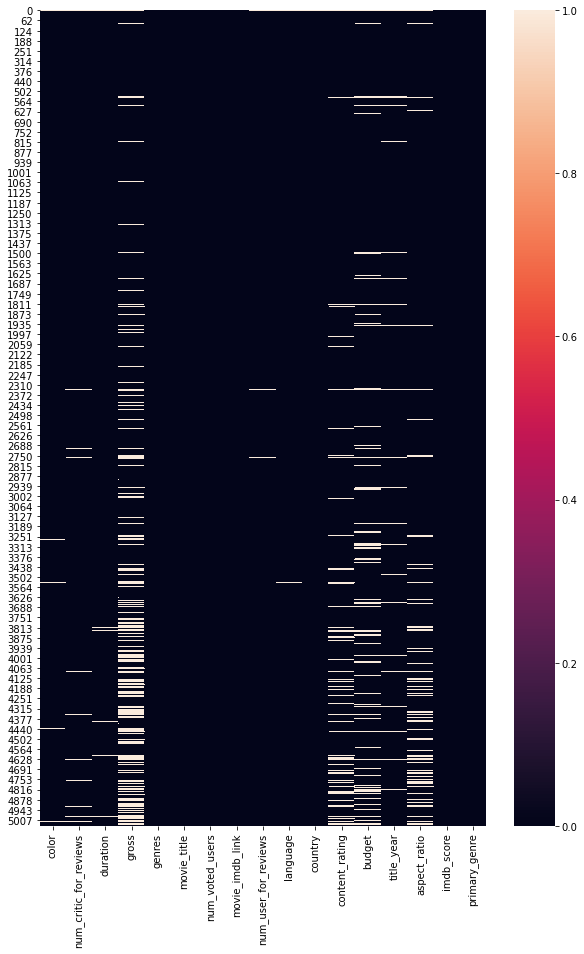

In [14]:
plt.figure(figsize=(10,15))
sns.heatmap(df_imdb.isnull())
plt.show()

In [15]:
df_imdb_num=df_imdb.select_dtypes(include='number')
df_imdb_cat=df_imdb.select_dtypes(include='object')

In [16]:
df_imdb_num.shape

(4996, 8)

In [17]:
df_imdb_cat.shape

(4996, 9)

In [18]:
# missing values in numerical columns

In [19]:
df_imdb_num.isnull().sum()

num_critic_for_reviews     49
duration                   15
gross                     873
num_voted_users             0
num_user_for_reviews       21
budget                    486
aspect_ratio              326
imdb_score                  0
dtype: int64

**Interpretation:** Out of 9 numerical columns 7 columns is having null values.

In [20]:
# missing values in categorical columns
df_imdb_cat.isnull().sum()

color               19
genres               0
movie_title          0
movie_imdb_link      0
language            12
country              5
content_rating     301
title_year         107
primary_genre        0
dtype: int64

**Interpretation:** Out of 9 categorical columns 5 columns is having null values.

In [21]:
# handling missing values of num columns with median
df_imdb_num=df_imdb_num.apply(lambda x: x.fillna(x.median()),axis=0)
df_imdb_num.shape

(4996, 8)

In [22]:
df_imdb_num.isnull().sum()

num_critic_for_reviews    0
duration                  0
gross                     0
num_voted_users           0
num_user_for_reviews      0
budget                    0
aspect_ratio              0
imdb_score                0
dtype: int64

In [23]:
# handling missing value of cat col with mode
df_imdb_cat=df_imdb_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_imdb_cat.shape

(4996, 9)

In [24]:
df_imdb_cat.isnull().sum()

color              0
genres             0
movie_title        0
movie_imdb_link    0
language           0
country            0
content_rating     0
title_year         0
primary_genre      0
dtype: int64

In [25]:
df_movies =pd.concat([df_imdb_num,df_imdb_cat],axis=1)

In [26]:
df_movies.shape

(4996, 17)

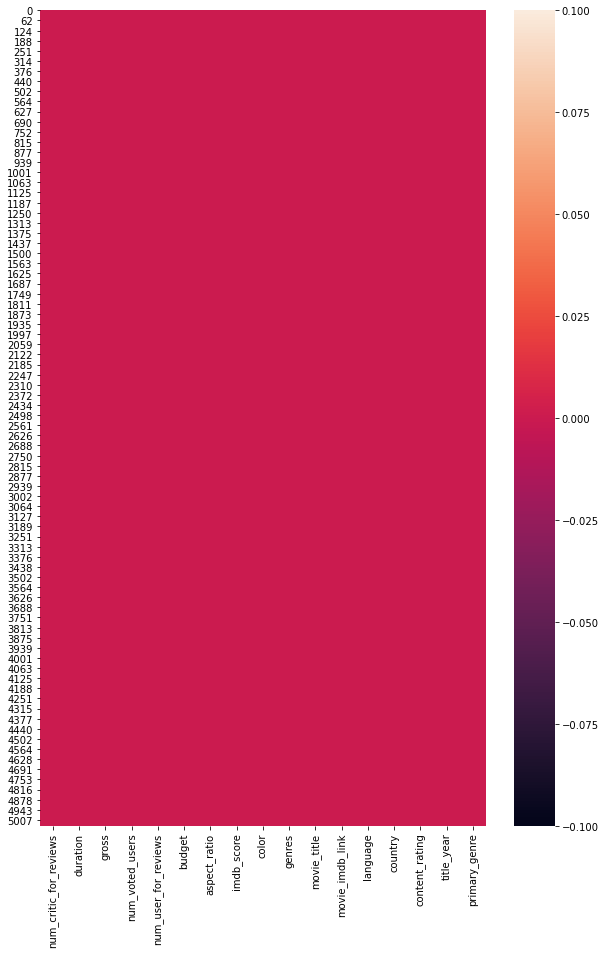

In [27]:
plt.figure(figsize=(10,15))
sns.heatmap(df_movies.isnull())
plt.show()

**Interpretation:** Heatmap showing no null values in the entire dataset.

# Univariate Analysis.

In [28]:
# univaraite categorical col analysis
df_imdb_cat.columns

Index(['color', 'genres', 'movie_title', 'movie_imdb_link', 'language',
       'country', 'content_rating', 'title_year', 'primary_genre'],
      dtype='object')

## Content Rating

In [29]:
freq_table=df_movies.groupby(['content_rating']).size().reset_index(name='Count')
freq_table1=freq_table
freq_table1.sort_values('Count', ascending=False,inplace=True)
freq_table1.head()

,content_rating,Count
9,R,2398
7,PG-13,1443
6,PG,698
5,Not Rated,116
1,G,112


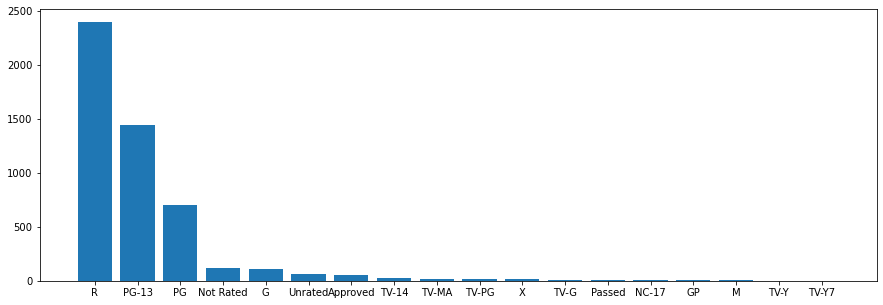

In [30]:
plt.rcParams['figure.figsize']=[15,5]
plt.bar(freq_table1['content_rating'],freq_table1['Count'])
plt.show()

**Interpretation:** Most of the movie are of rating R(restricted),(pG-13),(PG) parent guidance is suggested



## Color

In [31]:
freq_table=df_movies.groupby(['color']).size().reset_index(name='Count')
freq_table1=freq_table
freq_table1.sort_values('Count', ascending=False,inplace=True)
freq_table1.head()

,color,Count
1,Color,4789
0,Black and White,207


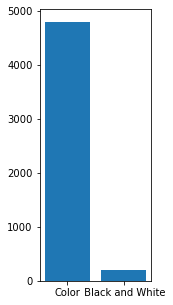

In [32]:
plt.rcParams['figure.figsize']=[2,5]
plt.bar(freq_table1['color'],freq_table1['Count'])
plt.show()

**Interpretation:** As we see from above graph from  1916-2016  that is since last century  most of the movie released in color only.



## Primary Genre

In [33]:
freq_table=df_movies.groupby(['primary_genre']).size().reset_index(name='Count')
freq_table1=freq_table
freq_table1.sort_values('Count', ascending=False,inplace=True)
freq_table2=freq_table1.head()
freq_table2

,primary_genre,Count
4,Comedy,1319
0,Action,1142
7,Drama,960
1,Adventure,450
5,Crime,347


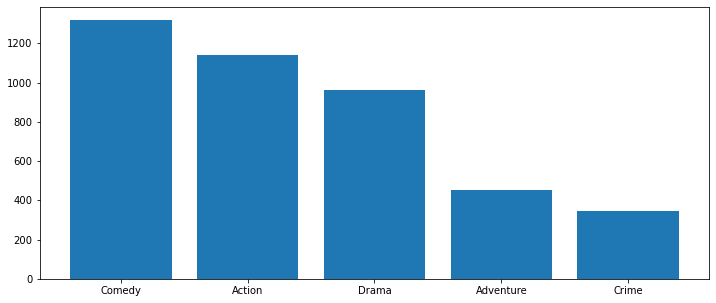

In [34]:
plt.rcParams['figure.figsize']=[12,5]
plt.bar(freq_table2['primary_genre'],freq_table2['Count'])
plt.show()

**Interpretation:** comedy,action,drama,adventure,crime were the top 5 genres since the last century where more movies is comming from.

## Language

In [35]:
freq_table=df_movies.groupby(['language']).size().reset_index(name='Count')
freq_table1=freq_table
freq_table1.sort_values('Count', ascending=False,inplace=True)
freq_table2=freq_table1.head()
freq_table2

,language,Count
11,English,4672
13,French,73
38,Spanish,40
17,Hindi,28
26,Mandarin,24


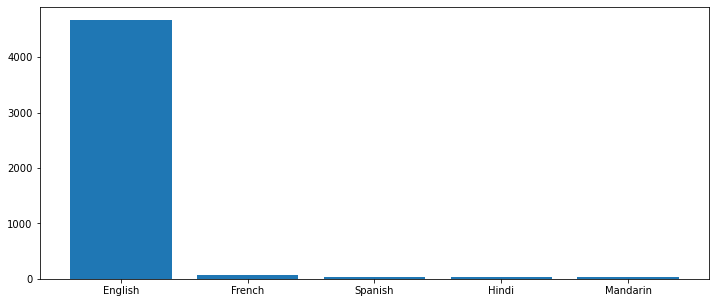

In [36]:
plt.rcParams['figure.figsize']=[12,5]
plt.bar(freq_table2['language'],freq_table2['Count'])
plt.show()

**Interpretation:** So the above plot is showing that most of the movie since the last century were primarily released in English language.

## Country

In [37]:
freq_table=df_movies.groupby(['country']).size().reset_index(name='Count')
freq_table1=freq_table
freq_table1.sort_values('Count', ascending=False,inplace=True)
freq_table2=freq_table1.head()
freq_table2

,country,Count
62,USA,3777
61,UK,443
19,France,154
10,Canada,124
21,Germany,96


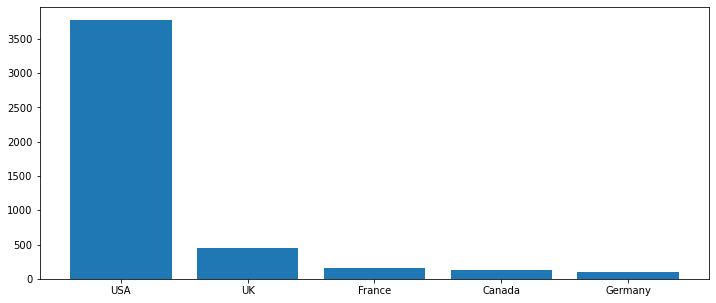

In [38]:
plt.rcParams['figure.figsize']=[12,5]
plt.bar(freq_table2['country'],freq_table2['Count'])
plt.show()

**Interpretation:** So this plot is showing that USA followed by UK are the top 2 countries
were most of the movies was produced in the last century.

## Title Year

In [39]:
freq_table=df_movies.groupby(['title_year']).size().reset_index(name='Count')
freq_table1=freq_table

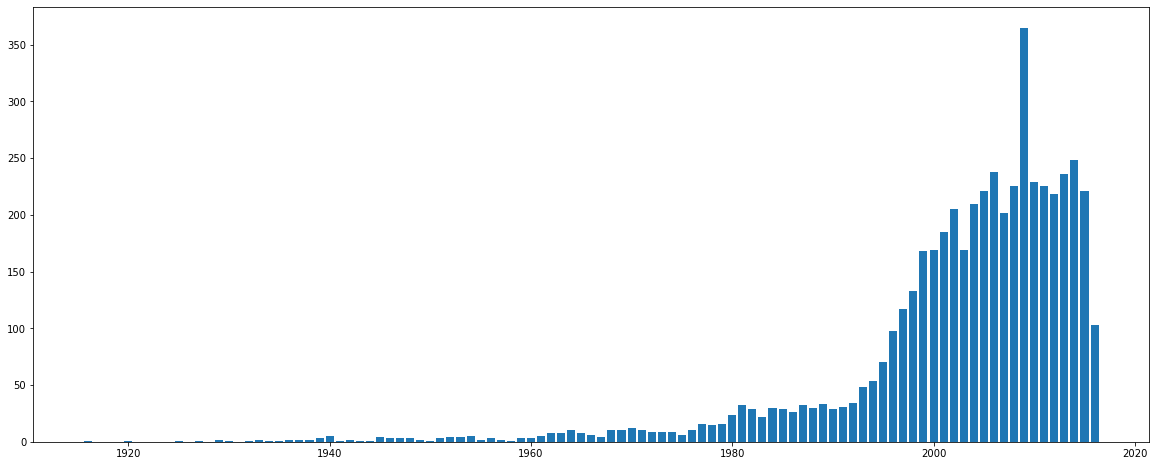

In [40]:
plt.rcParams['figure.figsize']=[20,8]
plt.bar(freq_table1['title_year'],freq_table1['Count'])
plt.show()

**Interpretation:** This graph is showing how the amount of movies relased per year
has increased exponentially since 1916-2016.

## Univariate Numerical columns Analysis

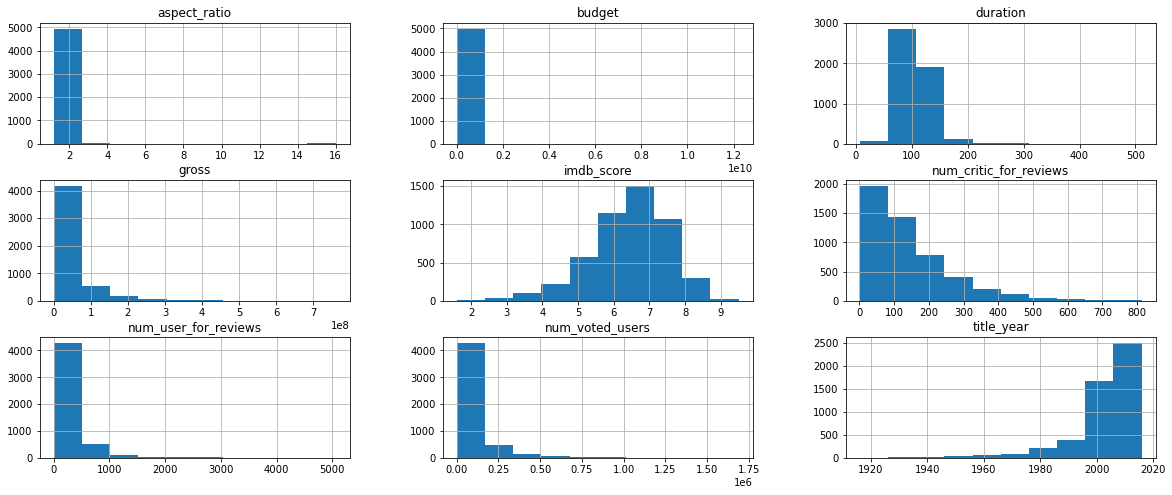

In [41]:
# univariate num col
df_movies_num=df_movies.select_dtypes(include='number')
df_movies_num.hist()
plt.show()

**Interpretation:** So above graph is showing the distribution of all numerical column
which help us in handling data transformation before ML model building
and no numerical column is normally distributed which means we have to use some transformation technique.

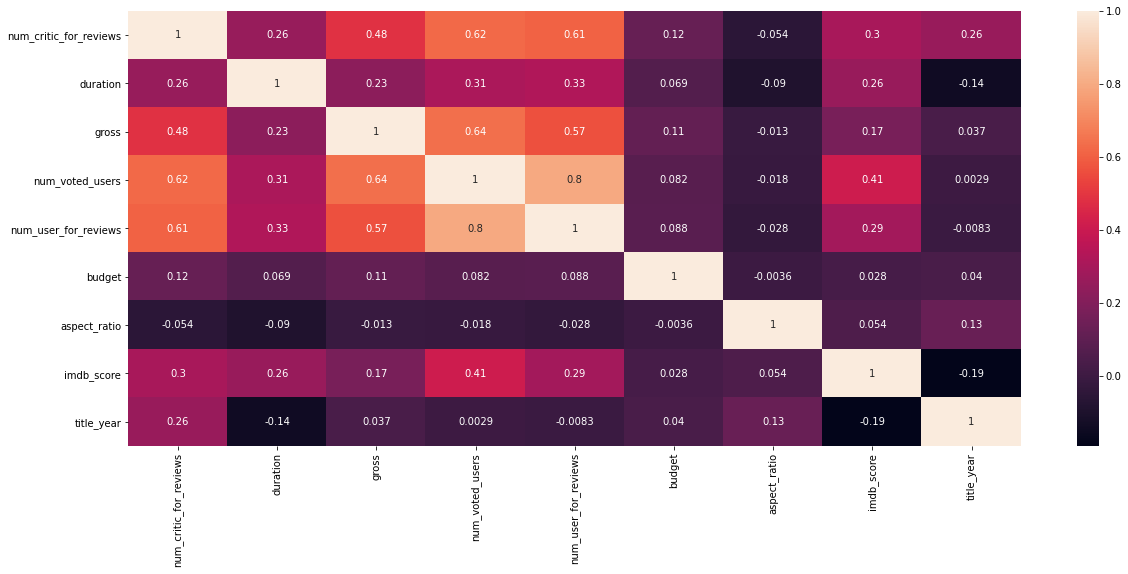

In [42]:
sns.heatmap(df_movies.corr(),annot=True)
plt.show()

**Interpretation:** From this correlation matrix we can see that there are some feature having some correlation b/w them like

num_crict_for_reviews correlated VS (num_voted_user,num_user_for_reviews)

gross VS num_voted_user

So there may be muliticollinearity present which we have to check using determinant of this correlation matrix and if present then remove it using vif technique

In [43]:
import scipy.linalg as la

la.det(df_movies.corr())

0.06270381596704461

**Interpretation:** So by calculating the det of corr matrix we say that it is near to 0. 
 So we have multicollinearity also present which we have to remove before model building

**EDA Conclusion:** So the conclusion from EDA is that we do have outlier in most of our features ,multicollinearity.
So we need to handle it with some proper transformation technique and vif technique respectively before Model Building. 

# Encoding the categorical data

In [45]:
encode = pd.get_dummies(data=df_movies, columns=['title_year','color','language','content_rating','primary_genre','country'])
encode.head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,aspect_ratio,imdb_score,genres,movie_title,...,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany
0,723.0,178.0,760505847.0,886204,3054.0,237000000.0,1.78,7.9,Action|Adventure|Fantasy|Sci-Fi,Avatar,...,0,0,0,0,0,0,0,1,0,0
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,2.35,7.1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,...,0,0,0,0,0,0,0,1,0,0
2,602.0,148.0,200074175.0,275868,994.0,245000000.0,2.35,6.8,Action|Adventure|Thriller,Spectre,...,0,0,0,0,0,0,1,0,0,0
3,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,2.35,8.5,Action|Thriller,The Dark Knight Rises,...,0,0,0,0,0,0,0,1,0,0
4,110.0,103.0,25450527.0,8,156.0,20000000.0,2.35,7.1,Documentary,Star Wars: Episode VII - The Force Awakens ...,...,0,0,0,0,0,0,0,1,0,0


**Interpretation:** So after encoding all the categorical variables we now have 255 columns in encoded form.

# Outliers

In [46]:
data2 = df_movies.copy()

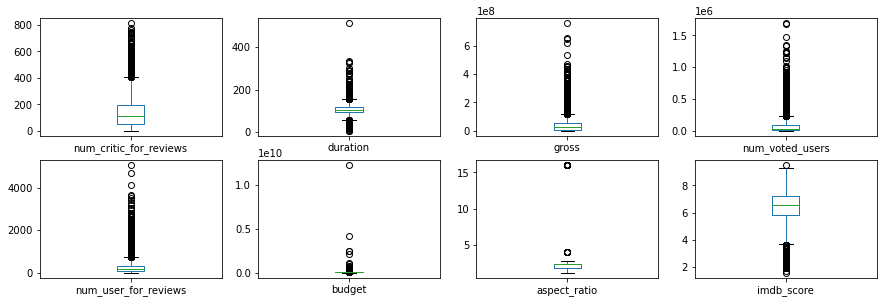

In [47]:
df_imdb_num.plot(kind='box',subplots=True,layout=(4,4), figsize=(15,10))
plt.show()

**Interpretation:** The boxplot clearly displays the outliers present in the numerical columns for which transformation is needed.Here most of the variables are left skewed.

Skewness: 4.034193374858156


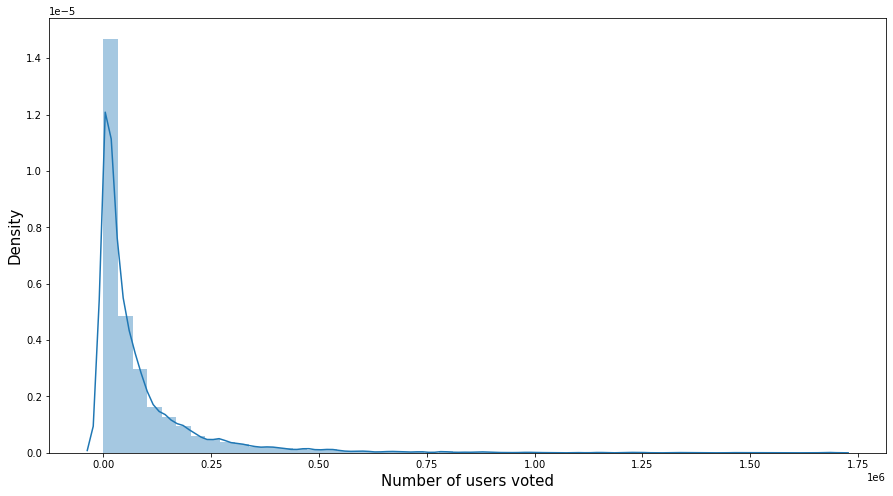

In [48]:
plt.rcParams["figure.figsize"] = [15,8]

ax = sns.distplot((df_movies['num_voted_users']))
ax.set_xlabel('Number of users voted', fontsize=15)

# coefficient of skewness 
print('Skewness:', (df_movies['num_voted_users']).skew())

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** It can be seen that the variable is positively skewed with the coefficient of skewness as 4.034. Apply the log transformation to reduce the skewness in the data.

Skewness: -0.9901772923202484


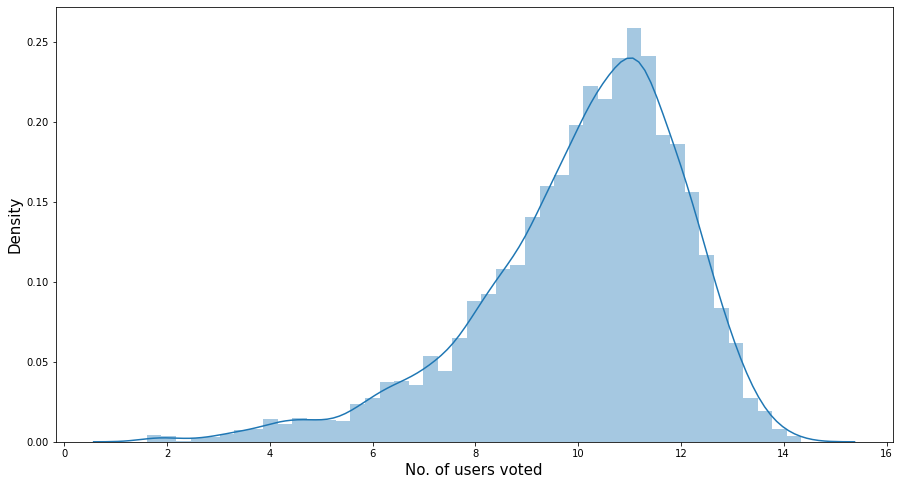

In [49]:
plt.rcParams["figure.figsize"] = [15,8] 

# apply natural log transformation (with base 'e')
np.log(df_movies['num_voted_users'])

# coefficient of skewness of transformed data
print('Skewness:', np.log(df_movies['num_voted_users']).skew())

# distribution of log_transformed variable
# ax: create an axes object in the figure
ax = sns.distplot(np.log(df_movies['num_voted_users']))

# set the label for x-axis
ax.set_xlabel('No. of users voted', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** The coefficient of skewness of the log_transformed data is near zero (-0.990). The distribution plot of the transformed variable is also more interpretable than the plot with original values.

## Outlier treatment using Transformation

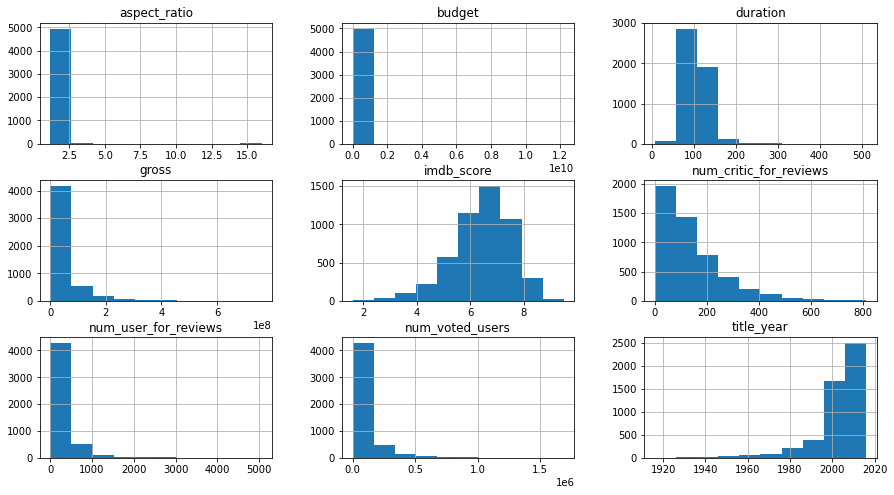

In [50]:
data2_num=df_movies.select_dtypes(include='number')
data2_num.hist()
plt.show()

In [51]:
data2['num_critic_for_reviews']= np.log(data2['num_critic_for_reviews'])
data2['duration']= np.log(data2['duration'])
data2['num_voted_users']= np.log(data2['num_voted_users'])
data2['aspect_ratio']= np.log(data2['aspect_ratio'])
data2['num_user_for_reviews']= np.log(data2['num_user_for_reviews'])
data2['budget']= np.sqrt(data2['budget'])
data2['gross']= np.log(data2['gross'])
data2['num_voted_users']= np.log(data2['num_voted_users'])

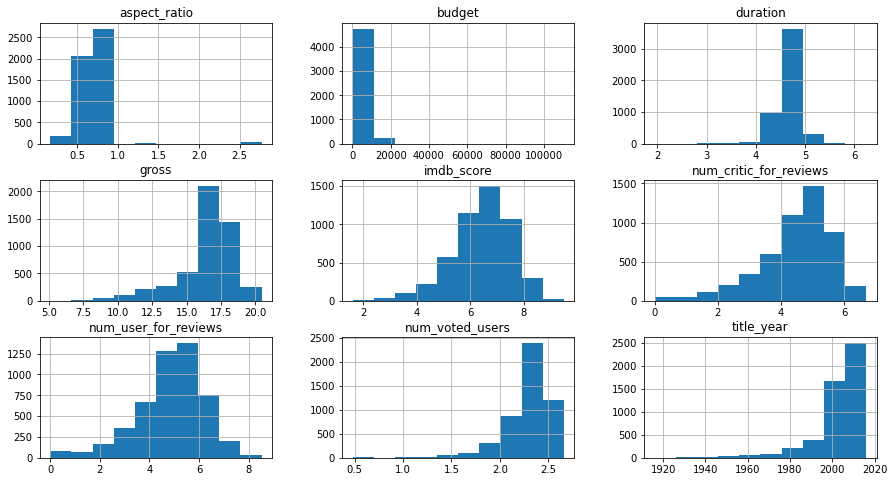

In [52]:
data2_num=data2.select_dtypes(include='number')
data2_num.hist()
plt.show()

In [53]:
df_movies=df_movies.drop(['movie_imdb_link','genres'],axis=1)

In [54]:
df_movies.shape

(4996, 15)

In [100]:
# df_movies.reset_index(inplace=True)
# df_movies.drop(columns=["index"],inplace=True)

# User defined functions to get the model performance scores

In [63]:
def get_train_rmse(model,X_train1):
    train_pred = model.predict(X_train1)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model,X_test1):
    test_pred = model.predict(X_test1)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model,X_test1):
    test_pred = model.predict(X_test1)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def get_score(model,X_train1):
    r_sq = model.score(X_train1, y_train)
    n = X_train1.shape[0]
    k = X_train1.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

score_card = pd.DataFrame(columns=['Model_Name', 'Alpha', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, X_train1,X_test1,alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model,X_test1),
                       'Train_RMSE': get_train_rmse(model,X_train1),
                       'Test_RMSE': get_test_rmse(model,X_test1), 
                       'R-Squared': get_score(model,X_train1)[0], 
                       'Adj. R-Squared': get_score(model,X_train1)[1]}, ignore_index = True)
    return score_card

# Model1: Simple full OLS Model

In [64]:
dummy=df_movies.select_dtypes(include="object").drop(columns=["movie_title"])
dummy1=pd.get_dummies(dummy[dummy.columns])
num=df_movies.select_dtypes(include="number").drop(columns=["imdb_score"])
X=pd.concat([num,dummy1],axis=1)
X=sm.add_constant(X)
y=df_movies["imdb_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
ols_all=sm.OLS(y_train,X_train).fit()
print(ols_all.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     15.29
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:43   Log-Likelihood:                -4835.3
No. Observations:                3996   AIC:                         1.013e+04
Df Residuals:                    3768   BIC:                         1.156e+04
Df Model:                         227                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [65]:
linear_reg=LinearRegression()
ols_all_linreg=linear_reg.fit(X_train, y_train)
update_score_card("Simple full OLS model",ols_all_linreg,X_train,X_test)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,0.8611,11.398791


### Interpretation:

**Model explains about 48% of the variance in the dependent variable by the predictor variables.**

**There is no auto-correlation as the Durbib-Watson test value is 2.**

**Since the p(JB)<0.05, the residuals are not normally distributed.**

**Presence of severe multicollinearity**

# Model 2: OLS  model with significant variables

**Here we will take the significant numerical and object features based on the p_values from the full model**

In [66]:
d = ols_all.pvalues[ols_all.pvalues<0.05].index.tolist()

In [67]:
dummy=df_movies.select_dtypes(include="object").drop(columns=["movie_title"])
dummy1=pd.get_dummies(dummy[dummy.columns])
num=df_movies.select_dtypes(include="number").drop(columns=["imdb_score"])
X=pd.concat([num,dummy1],axis=1)
X=sm.add_constant(X)
X=X[d]
y=df_movies["imdb_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
ols_significant=sm.OLS(y_train,X_train).fit()
print(ols_significant.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.20
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:44   Log-Likelihood:                -4904.1
No. Observations:                3996   AIC:                             9932.
Df Residuals:                    3934   BIC:                         1.032e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [68]:
linear_reg=LinearRegression()
ols_significant_linreg=linear_reg.fit(X_train, y_train)
update_score_card("OLS model with significant variables",ols_significant_linreg,X_train,X_test)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,0.8611,11.398791
1,OLS model with significant variables,-,-,0.461188,0.452555,0.8256,0.8564,11.363497


# Non-multicollinearity check using VIF factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric_features_vif = df_movies.drop(columns="imdb_score").select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4.812984,duration
1,4.583948,num_voted_users
2,4.515385,num_user_for_reviews
3,4.038856,num_critic_for_reviews
4,3.115138,aspect_ratio
5,2.619696,gross
6,1.057657,budget


In [70]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    vif.sort_values("VIF_Factor",ascending=False)
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features, axis=1)
    else:
        print(vif)

   VIF_Factor                Features
0    4.038856  num_critic_for_reviews
1    4.812984                duration
2    2.619696                   gross
3    4.583948         num_voted_users
4    4.515385    num_user_for_reviews
5    1.057657                  budget
6    3.115138            aspect_ratio


# Model 3: OLS model with non-multicollinear features

In [71]:
df_num=df_movies.select_dtypes(include="number").columns
num_significant_cols=[];cat_significant_cols=[]

for i in d:
    if i in df_num:
        num_significant_cols.append(i)
    else:
        cat_significant_cols.append(i)

In [72]:
dummy=df_movies.select_dtypes(include="object").drop(columns=["movie_title"])
dummy1=pd.get_dummies(dummy[dummy.columns])
cat_significant_cols.remove('const')
dummy1=dummy1[cat_significant_cols]
X=pd.concat([df_movies[vif.Features.tolist()],dummy1],axis=1)
X=sm.add_constant(X)
y=df_movies["imdb_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_vif=sm.OLS(y_train,X_train).fit()
print(OLS_vif.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     53.63
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:44   Log-Likelihood:                -4900.5
No. Observations:                3996   AIC:                             9929.
Df Residuals:                    3932   BIC:                         1.033e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
linear_reg=LinearRegression()
ols_nonmulticollinear_linreg_std=linear_reg.fit(X_train, y_train)
update_score_card("OLS model with non-multicollinear features",ols_nonmulticollinear_linreg_std,X_train,X_test)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,0.8611,11.398791
1,OLS model with significant variables,-,-,0.461188,0.452555,0.8256,0.8564,11.363497
2,OLS model with non-multicollinear features,-,-,0.462149,0.453253,0.8248,0.8538,11.326303


# Model 4: OLS model scaled(Normalised)

In [101]:

dummy=df_movies.select_dtypes(include="object").drop(columns=["movie_title"])
dummy1=pd.get_dummies(dummy[dummy.columns])
dummy1=dummy1[cat_significant_cols]
a=df_movies[num_significant_cols]
mm=MinMaxScaler()
b=mm.fit_transform(df_movies[num_significant_cols])
dfn1=pd.DataFrame(b,columns=num_significant_cols)
X=pd.concat([dfn1,dummy1],axis=1)
X=sm.add_constant(X)
y=df_movies["imdb_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_Scaled_nrm=sm.OLS(y_train,X_train).fit()
print(OLS_Scaled_nrm.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     55.20
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:14:01   Log-Likelihood:                -4904.1
No. Observations:                3996   AIC:                             9932.
Df Residuals:                    3934   BIC:                         1.032e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [75]:
linear_reg=LinearRegression()
ols_significant_linreg_nrm=linear_reg.fit(X_train, y_train)
update_score_card("OLS model scaled(Normalised)",ols_significant_linreg_nrm,X_train,X_test)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,0.8611,11.398791
1,OLS model with significant variables,-,-,0.461188,0.452555,0.8256,0.8564,11.363497
2,OLS model with non-multicollinear features,-,-,0.462149,0.453253,0.8248,0.8538,11.326303
3,OLS model scaled(Normalised),-,-,0.461011,0.452375,0.8257,0.8575,11.378893


# Assumptions of Linear Regression

## 1. Detecting Autocorrelation

The null and alternate hypothesis of Durbin-Watson test is as follows:

      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals

**"r" is the Durbin-Watson Test values.**

**for r == 0, indicating no serial correlation, the test statistic equals 2.**

**The closer to 0 the statistic, the more evidence for positive serial correlation.**

**The closer to 4, the more evidence for negative serial correlation**

**From the summary output, we see that the Durbin-Watson static is 2.030. There is no autocorrelation.**

## 2. Detecting Heteroskedasticity

Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:

H0: The residuals are homoskedastic
H1: The residuals are not homoskedastic

In [76]:
dummy=df_movies.select_dtypes(include="object").drop(columns=["movie_title"])
dummy1=pd.get_dummies(dummy[dummy.columns])
dummy1=dummy1[cat_significant_cols]
a=df_movies[num_significant_cols]
mm=MinMaxScaler()
b=mm.fit_transform(df_movies[num_significant_cols])
dfn1=pd.DataFrame(b,columns=num_significant_cols)
X=pd.concat([dfn1,dummy1],axis=1)
X=sm.add_constant(X)
y=df_movies["imdb_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_Scaled_nrm=sm.OLS(y_train,X_train).fit()

In [77]:
from statsmodels.compat import lzip
name = ['f-value','p-value']           
test = sms.het_breuschpagan(OLS_Scaled_nrm.resid, OLS_Scaled_nrm.model.exog)
lzip(name, test)   

[('f-value', 291.9140778891034), ('p-value', 1.6358177917253858e-31)]

**We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data.**

## 3. Linearity of Residuals

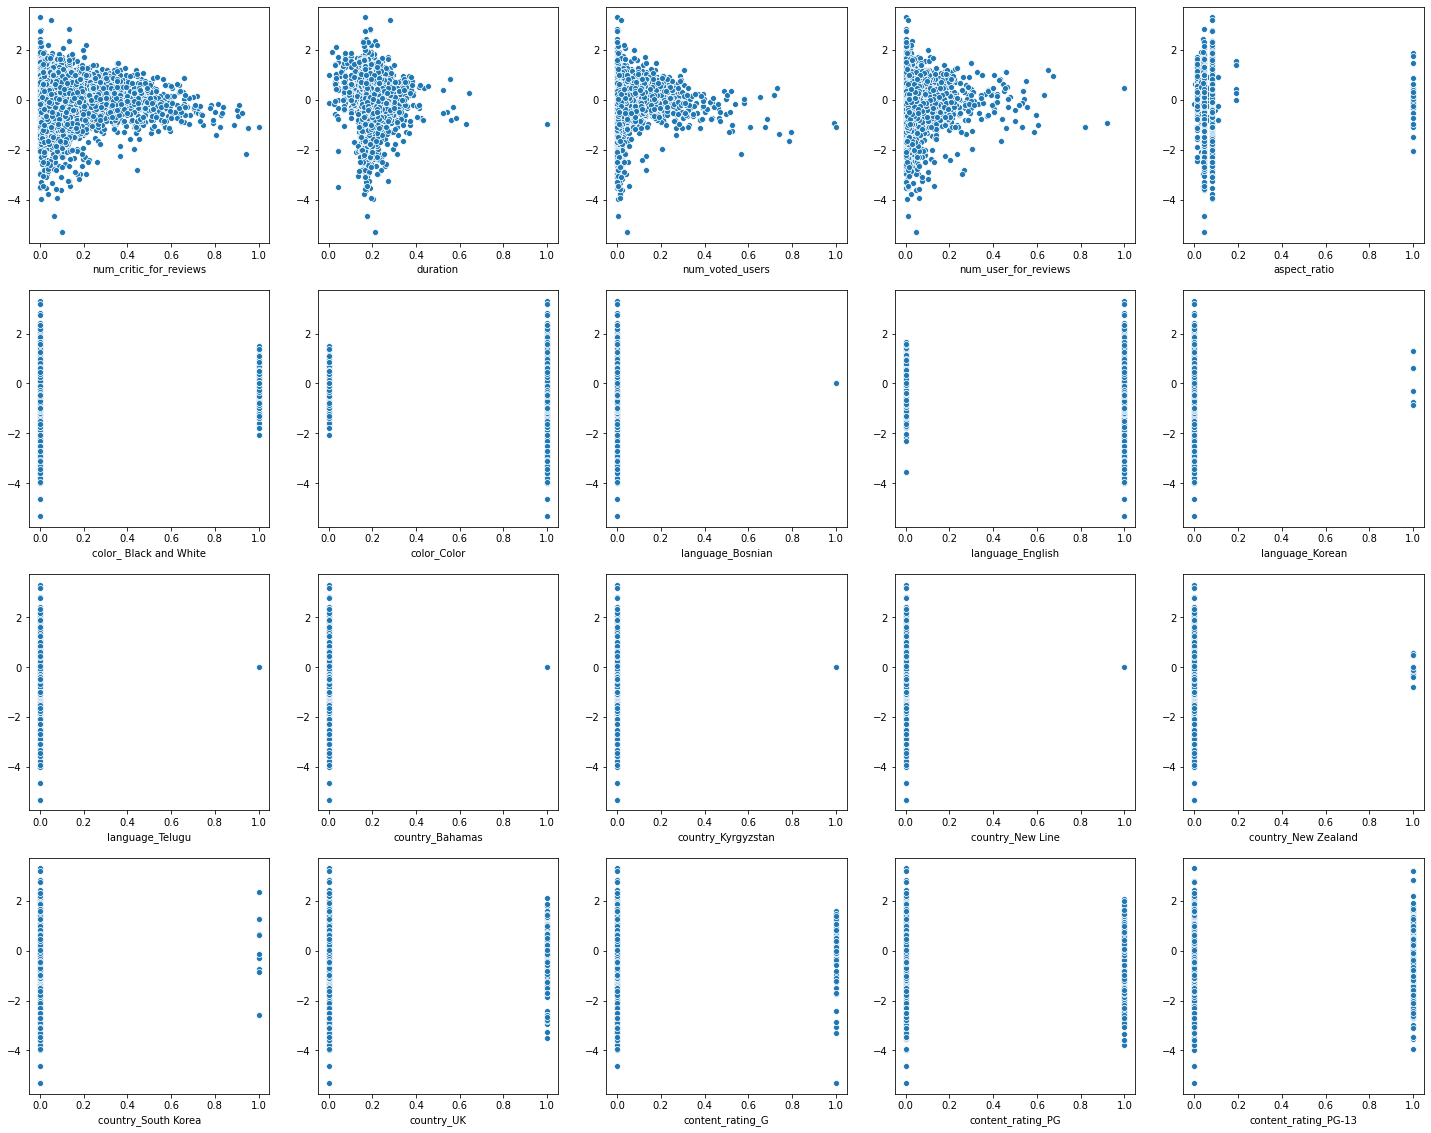

In [78]:
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], OLS_Scaled_nrm.resid , ax=subplot)
plt.show()

**From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.**

## 4. Normality of Residuals

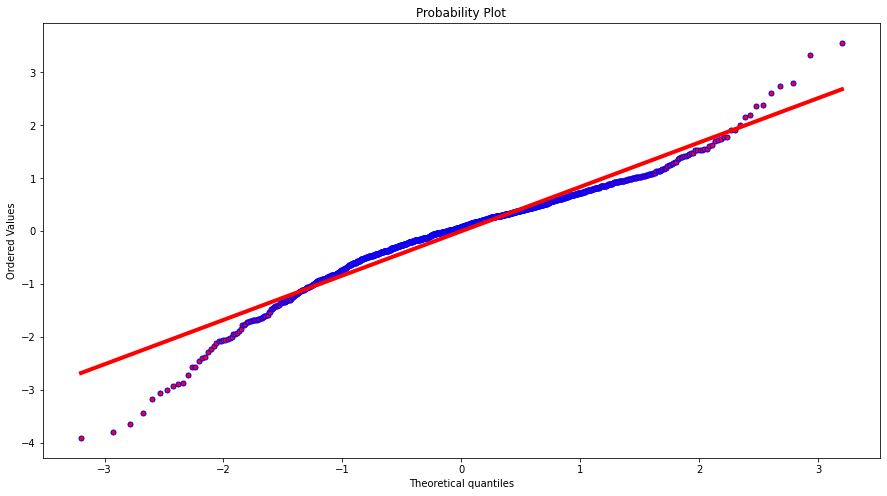

In [79]:
fitted_vals = OLS_Scaled_nrm.predict(X_test)
resids = y_test - fitted_vals
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
stats.probplot(resids, plot=plt)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markersize(5.0)
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[1].set_linewidth(4.0)
plt.show()

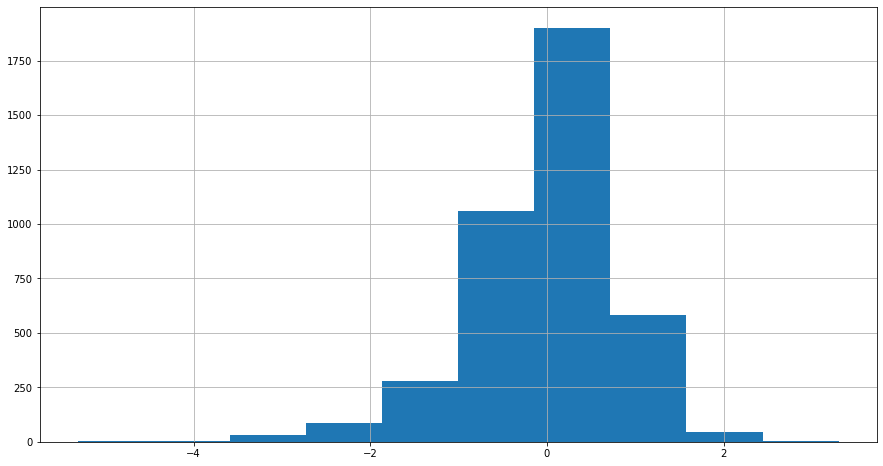

In [80]:
OLS_Scaled_nrm.resid.hist()
plt.show()

**SInce the QQ plot and the hist plot of the residual are not normal, residual data is not normally distributed.**

## Jarque_Bera test

Null and Alternate Hypothesis:

H0: The data is normally distributed

H1: The data is not normally distributed

In [81]:
stat, p = jarque_bera(OLS_Scaled_nrm.resid)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=1736.898, p-value=0.000
The data is not normally distributed (reject H0)


# Feature Selection

## Selecting significant features using Recursive Feature Elimination

In [82]:
encoded = pd.get_dummies(data=df_movies, columns=['title_year','color','language','content_rating','primary_genre','country'])
df_movies['title_year']=df_movies['title_year'].astype("object")
x = encoded.drop(['movie_title','imdb_score'],axis=1)
x = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x, df_movies['imdb_score'], random_state = 10, test_size = 0.2)

In [83]:
X_train.shape

(3996, 252)

In [84]:
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select=200)
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features:',signi_feat_rfe)

Significant features: Index(['title_year_1916.0', 'title_year_1925.0', 'title_year_1927.0',
       'title_year_1930.0', 'title_year_1933.0', 'title_year_1934.0',
       'title_year_1936.0', 'title_year_1937.0', 'title_year_1938.0',
       'title_year_1939.0',
       ...
       'country_Spain', 'country_Sweden', 'country_Switzerland',
       'country_Taiwan', 'country_Thailand', 'country_Turkey', 'country_UK',
       'country_USA', 'country_United Arab Emirates', 'country_West Germany'],
      dtype='object', length=200)


In [85]:
new_X_train = X_train[signi_feat_rfe]
linreg = LinearRegression()

linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.23015321808674638

In [86]:
update_score_card("Getting significant variables with RFE",linreg,X_train[signi_feat_rfe],X_test[signi_feat_rfe])

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,8.611000e-01,1.139879e+01
1,OLS model with significant variables,-,-,0.461188,0.452555,0.8256,8.564000e-01,1.136350e+01
2,OLS model with non-multicollinear features,-,-,0.462149,0.453253,0.8248,8.538000e-01,1.132630e+01
3,OLS model scaled(Normalised),-,-,0.461011,0.452375,0.8257,8.575000e-01,1.137889e+01
4,Getting significant variables with RFE,-,-,0.230153,0.189582,0.9868,1.329744e+11,8.609846e+10


**Interpretation:** As we can see our R2 and Adj R2 decreases when we select features using RFE method.

In [87]:
MLR_1 = sm.OLS(y_train, X_train).fit()
print(MLR_1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     15.29
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:53   Log-Likelihood:                -4835.3
No. Observations:                3996   AIC:                         1.013e+04
Df Residuals:                    3768   BIC:                         1.156e+04
Df Model:                         227                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [88]:
y_pred = MLR_1.predict(X_train)
y_pred.head()

798     5.956132
4981    5.809228
2713    6.661163
1586    6.045949
56      7.195596
dtype: float64

In [89]:
print('RMSE on train set: ', get_train_rmse(MLR_1,X_train))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_1,X_test))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_1,X_test) - get_train_rmse(MLR_1,X_train))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)



RMSE on train set:  0.8115
RMSE on test set:  0.8618
Difference between RMSE on train and test set:  0.05030000000000001


**Interpretation:** RMSE on the training set is 0.8115, while on the test set it is 0.8618. We can see that there is a difference in the RMSE of the train and the test set. This implies that our model has overfitted on the train set. 

To deal with the problem of overfitting, we study the approach of `Regularization` in the next section.

#  Model Improvement

## Lasso Regularization

In [90]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('RMSE on test set:', rmse_test)
print('RMSE on train set: ', get_train_rmse(lasso,X_train))
print('Difference:',abs(get_train_rmse(lasso,X_train)-rmse_test))

RMSE on test set: 0.9047
RMSE on train set:  0.8959
Difference: 0.008799999999999919


In [91]:
df_lasso_coeff = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.5:')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.5:


['const',
 'title_year_1916.0',
 'title_year_1920.0',
 'title_year_1925.0',
 'title_year_1927.0',
 'title_year_1929.0',
 'title_year_1930.0',
 'title_year_1932.0',
 'title_year_1933.0',
 'title_year_1934.0',
 'title_year_1935.0',
 'title_year_1936.0',
 'title_year_1937.0',
 'title_year_1938.0',
 'title_year_1939.0',
 'title_year_1940.0',
 'title_year_1941.0',
 'title_year_1942.0',
 'title_year_1943.0',
 'title_year_1944.0',
 'title_year_1945.0',
 'title_year_1946.0',
 'title_year_1947.0',
 'title_year_1948.0',
 'title_year_1949.0',
 'title_year_1950.0',
 'title_year_1951.0',
 'title_year_1952.0',
 'title_year_1953.0',
 'title_year_1954.0',
 'title_year_1955.0',
 'title_year_1956.0',
 'title_year_1957.0',
 'title_year_1958.0',
 'title_year_1959.0',
 'title_year_1960.0',
 'title_year_1961.0',
 'title_year_1962.0',
 'title_year_1963.0',
 'title_year_1964.0',
 'title_year_1965.0',
 'title_year_1966.0',
 'title_year_1967.0',
 'title_year_1968.0',
 'title_year_1969.0',
 'title_year_1970.0',


In [92]:
print('Significant variables obtained from Lasso Regression when alpha is 0.01:')
signi_feat_rfe = df_lasso_coeff.Variable[df_lasso_coeff.Coefficient != 0].to_list()
signi_feat_rfe

Significant variables obtained from Lasso Regression when alpha is 0.01:


['num_critic_for_reviews',
 'duration',
 'gross',
 'num_voted_users',
 'num_user_for_reviews',
 'budget',
 'aspect_ratio',
 'title_year_2009.0',
 'title_year_2010.0',
 'title_year_2011.0',
 'title_year_2012.0',
 'title_year_2013.0',
 'title_year_2014.0',
 'title_year_2015.0',
 'color_ Black and White',
 'language_English',
 'content_rating_PG',
 'content_rating_PG-13',
 'content_rating_R',
 'primary_genre_Action',
 'primary_genre_Biography',
 'primary_genre_Comedy',
 'primary_genre_Crime',
 'primary_genre_Documentary',
 'primary_genre_Drama',
 'primary_genre_Horror',
 'country_UK',
 'country_USA']

**Interpretation:** Lasso regression method has given us a reduced number of significant variables. We build a new model using only these features.

In [93]:
X = sm.add_constant(X_train[signi_feat_rfe])
MLR_2 = sm.OLS(y_train, X).fit()
print(MLR_2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     97.04
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:34:53   Log-Likelihood:                -5097.3
No. Observations:                3996   AIC:                         1.025e+04
Df Residuals:                    3967   BIC:                         1.044e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [94]:
train_pred = MLR_2.predict(X)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print('RMSE on train set: ', rmse_train)

# print training RMSE
test_pred = sm.add_constant(X_test[signi_feat_rfe])

test_pred = MLR_2.predict(test_pred)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print('RMSE on test set: ',rmse_test)

# calculate the difference between train and test set RMSE
difference = abs(rmse_test - rmse_train)

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.8665
RMSE on test set:  0.8808
Difference between RMSE on train and test set:  0.01429999999999998


**Interpretation:** When we considered all features, the difference between RMSE train and RMSE test was 0.05 and as seen from above result, using regression the difference value has decreased to 0.014.

# Model Improvement using Grid Search

## Lasso Regression

In [95]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}]
                     
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, param_grid = tuned_paramaters, cv=10)
lasso_grid.fit(X_train[signi_feat_rfe], y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

train_pred = lasso_grid.predict(X_train[signi_feat_rfe])
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print('RMSE on train set: ', rmse_train)


test_pred = lasso_grid.predict(X_test[signi_feat_rfe])
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print('RMSE on test set: ',rmse_test)
print('Difference in RMSE in train and test sets:', abs(rmse_train-rmse_test))

Best parameters for Lasso Regression:  {'alpha': 0.0001} 

RMSE on train set:  0.8665
RMSE on test set:  0.8807
Difference in RMSE in train and test sets: 0.01419999999999999


**Interpretation:** Using GridSearch we can converge on the most suitable value of alpha(0.0001 in this case) to get the best fit model with significant features using Lasso regression.

The same can be done using Elastic Net regression aided by Grid Search also.

## Elastic Net regression

In [96]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train[signi_feat_rfe], y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# # print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
# print('RMSE on test set:', get_test_rmse(enet_grid))

train_pred = enet_grid.predict(X_train[signi_feat_rfe])
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print('RMSE on train set: ', rmse_train)


test_pred = enet_grid.predict(X_test[signi_feat_rfe])
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print('RMSE on test set: ',rmse_test)
print('Difference in RMSE in train and test sets:', abs(rmse_train-rmse_test))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on train set:  0.8665
RMSE on test set:  0.8808
Difference in RMSE in train and test sets: 0.01429999999999998


**Interpretation:** Using regularization techniques like Lasso and Elastic Net, we have decreased the overfitting caused in our model to give better results for test data.

In [97]:
update_score_card("OLS using ELastic Net Grid Search",enet_grid,X_train[signi_feat_rfe],X_test[signi_feat_rfe])

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.479434,0.444387,0.8115,8.611000e-01,1.139879e+01
1,OLS model with significant variables,-,-,0.461188,0.452555,0.8256,8.564000e-01,1.136350e+01
2,OLS model with non-multicollinear features,-,-,0.462149,0.453253,0.8248,8.538000e-01,1.132630e+01
3,OLS model scaled(Normalised),-,-,0.461011,0.452375,0.8257,8.575000e-01,1.137889e+01
4,Getting significant variables with RFE,-,-,0.230153,0.189582,0.9868,1.329744e+11,8.609846e+10
5,OLS using ELastic Net Grid Search,-,-,0.406492,0.402303,0.8665,8.808000e-01,1.170185e+01


# Thank You